## 1. Introduccion del caso

El conjunto de datos utilizado en este estudio fue obtenido del portal de Datos Abiertos del Estado Peruano, específicamente del dataset titulado “Exámenes de Laboratorio de Consulta Externa de Pacientes Diagnosticados con Patologías Relacionadas a Enfermedad Renal”, disponible en el siguiente enlace: https://datosabiertos.gob.pe/dataset/ex%C3%A1menes-de-laboratorio-de-consulta-externa-de-pacientes-diagnosticados-con-patolog%C3%ADas-11.

Este dataset es proporcionado por el Seguro Social de Salud – EsSalud y contiene información anonimizada sobre pacientes atendidos en consulta externa, diagnosticados con enfermedades renales. Incluye resultados de exámenes de laboratorio como hemoglobina, hematocrito, creatinina, entre otros, así como variables complementarias como edad, sexo, fecha de atención, y ubicación geográfica (departamento, provincia y distrito).

Con el fin de garantizar la disponibilidad y facilitar su uso programático, se descargó el archivo en formato CSV y se alojó en un repositorio público en GitHub, desde el cual puede accederse directamente a la versión raw mediante el siguiente enlace: https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_5.csv

## 2. Análisis exploratorio de datos

### 2.1. Importación de librerias necesarias

In [1]:
#Para esta actividad se instalarán las siguientes librerías:
%pip install pandas matplotlib numpy seaborn scikit-learn xgboost -q


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Para esta actividad se importaran las siguientes librerías:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier

# 2.2 Carga del dataset

In [3]:
# Define the list of dataset URLs
datasets = [
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_1.csv",
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_2.csv",
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_3.csv",
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_4.csv",
    "https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_5.csv"
]

# Initialize an empty list to store individual dataframes
dataframes = []

# Loop through each dataset URL and load into dataframes list
for url in datasets:
    try:
        df = pd.read_csv(url)
        dataframes.append(df)
        print(f"Successfully loaded dataset from {url}")
    except Exception as e:
        print(f"Error loading {url}: {e}")


Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_1.csv
Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_2.csv
Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_3.csv
Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_4.csv
Successfully loaded dataset from https://raw.githubusercontent.com/the-eagle-eye/G5_machine_learning/refs/heads/main/dataset_ExamenesLaboratorio_5.csv


In [4]:
# Merge all dataframes into a single dataframe
anemia_df = pd.concat(dataframes, axis=0, ignore_index=True)

# Display basic information about the merged dataframe
print(f"\nMerged dataframe has {anemia_df.shape[0]} rows and {anemia_df.shape[1]} columns")

# Display the first few rows of the merged dataframe
anemia_df.head()


Merged dataframe has 115349 rows and 30 columns


,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,RED,IPRESS,ID_PACIENTE,EDAD_PACIENTE,SEXO_PACIENTE,...,RESULTADO_1,UNIDADES_1,FEC_RESULTADO_2,PROCEDIMIENTO_2,RESULTADO_2,UNIDADES_2,HEMOGLOBINA,MCH,MCHC,MCV
0,20240531,CALLAO,CALLAO,BELLAVISTA,70102,RED ASISTENCIAL SABOGAL,H.N. ALBERTO SABOGAL SOLOGUREN,eJwzNDU3NzI2NDGwNLUwtrQwNwMAH1gDhg==,80,MASCULINO,...,94.00,mg/dL,20200102,DOSAJE DE CREATININA EN SANGRE,1.18,mg/dL,"12,2","24,8","30,8","97,7"
1,20240531,HUANUCO,HUANUCO,AMARILIS,100102,RED ASISTENCIAL HUANUCO,H.II HUANUCO,eJwzNDUwMTQ2NjIzNzU3tTA2MgQAHsIDcA==,70,FEMENINO,...,0.61,mg/dL,20200107,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",140.0,mg/dL,"15,9","22,5",29,91
2,20240531,HUANUCO,HUANUCO,AMARILIS,100102,RED ASISTENCIAL HUANUCO,H.II HUANUCO,eJwzNDUwMDYwMjYytzAxNzUyMQQAHl0DZw==,61,MASCULINO,...,1.16,mg/dL,20200108,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",105.0,mg/dL,"11,3","19,1","27,2","77,7"
3,20240531,HUANUCO,HUANUCO,AMARILIS,100102,RED ASISTENCIAL HUANUCO,H.II HUANUCO,eJwzNLG0MDYzMzEzMDE1sjAxMAAAH4gDdw==,91,MASCULINO,...,1.54,mg/dL,20200108,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",94.0,mg/dL,"14,9","18,3","30,1","75,6"
4,20240531,HUANUCO,HUANUCO,AMARILIS,100102,RED ASISTENCIAL HUANUCO,H.II HUANUCO,eJwzNDUwMDY2MjAxNrK0NDY3MwEAHmEDbg==,52,MASCULINO,...,9.97,mg/dL,20200125,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",101.0,mg/dL,"9,8","17,3","30,5","91,1"


## 2.3 Caracterizacion del Dataset

Antes de empezar a trabajar con un dataset para la creación de modelos de machine learning es necesario analizar algunas de sus caracteristicas, por ejemplo:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias pertenecientes a cada clase en la variable objetivo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

El análisis puede realizarse mediante tablas o en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)

In [5]:
#Revisión de tipo de datos de las variables de entrada y objetivo
df.info()
print()

#Evaluando dimensión del dataset (numero de filas y columnas) con la funcion shape
print("El dataset tiene", df.shape[0], "instancias y", df.shape[1], "columnas.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15349 entries, 0 to 15348
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FECHA_CORTE             15349 non-null  int64  
 1   DEPARTAMENTO            15349 non-null  object 
 2   PROVINCIA               15349 non-null  object 
 3   DISTRITO                15349 non-null  object 
 4   UBIGEO                  15349 non-null  int64  
 5   RED                     15349 non-null  object 
 6   IPRESS                  15349 non-null  object 
 7   ID_PACIENTE             15349 non-null  object 
 8   EDAD_PACIENTE           15349 non-null  int64  
 9   SEXO_PACIENTE           15349 non-null  object 
 10  EDAD_MEDICO             15349 non-null  int64  
 11  ID_MEDICO               15349 non-null  object 
 12  COD_DIAG                15349 non-null  object 
 13  DIAGNOSTICO             15349 non-null  object 
 14  AREA_HOSPITALARIA       15349 non-null

In [6]:
#Análisis de campos nulos
conteo_null = anemia_df.isnull().sum()
print("Numero de valores nulos por columna: ")
print(conteo_null)

Numero de valores nulos por columna: 
FECHA_CORTE               0
DEPARTAMENTO              0
PROVINCIA                 0
DISTRITO                  0
UBIGEO                    0
RED                       0
IPRESS                    0
ID_PACIENTE               0
EDAD_PACIENTE             0
SEXO_PACIENTE             0
EDAD_MEDICO               0
ID_MEDICO                 0
COD_DIAG                  0
DIAGNOSTICO               0
AREA_HOSPITALARIA         0
SERVICIO_HOSPITALARIO     0
ACTIVIDAD_HOSPITALARIA    0
FECHA_MUESTRA             0
FEC_RESULTADO_1           0
PROCEDIMIENTO_1           0
RESULTADO_1               0
UNIDADES_1                0
FEC_RESULTADO_2           0
PROCEDIMIENTO_2           0
RESULTADO_2               0
UNIDADES_2                0
HEMOGLOBINA               0
MCH                       0
MCHC                      0
MCV                       0
dtype: int64


In [7]:
# Para este ejercicio, es necesario que HEMOGLOBINA, MCH, MCHC y MCV sean de tipo float.
anemia_df['HEMOGLOBINA'] = anemia_df['HEMOGLOBINA'].astype(str).str.replace(',', '.').astype(float)
anemia_df['MCH'] = anemia_df['MCH'].astype(str).str.replace(',', '.').astype(float)
anemia_df['MCHC'] = anemia_df['MCHC'].astype(str).str.replace(',', '.').astype(float)
anemia_df['MCV'] = anemia_df['MCV'].astype(str).str.replace(',', '.').astype(float)


In [8]:
# Seleccionar solo las columnas numéricas del DataFrame df
dfnum = anemia_df.select_dtypes(include=[np.number])
dfnum.describe()

,FECHA_CORTE,UBIGEO,EDAD_PACIENTE,EDAD_MEDICO,FECHA_MUESTRA,FEC_RESULTADO_1,RESULTADO_1,FEC_RESULTADO_2,HEMOGLOBINA,MCH,MCHC,MCV
count,115349.0,115349.000000,115349.000000,115349.000000,1.153490e+05,1.153490e+05,115349.000000,1.153490e+05,115349.000000,115349.000000,115349.000000,115349.000000
mean,20240531.0,131023.910732,66.370294,46.517430,2.022426e+07,2.022427e+07,40.570421,2.022427e+07,12.492889,21.990829,29.004592,85.545911
std,0.0,57039.229998,15.461049,9.544202,1.144138e+04,1.143932e+04,66.047166,1.143950e+04,2.542406,3.988446,1.100855,8.944622
min,20240531.0,10101.000000,0.000000,23.000000,2.020010e+07,2.020010e+07,0.000000,2.020010e+07,8.100000,15.100000,27.100000,70.000000
25%,20240531.0,80101.000000,58.000000,39.000000,2.022022e+07,2.022022e+07,1.370000,2.022022e+07,10.300000,18.500000,28.100000,77.800000
50%,20240531.0,150101.000000,69.000000,46.000000,2.023013e+07,2.023020e+07,4.950000,2.023020e+07,12.500000,22.000000,29.000000,85.600000
75%,20240531.0,150142.000000,77.000000,53.000000,2.023093e+07,2.023093e+07,88.000000,2.023093e+07,14.700000,25.400000,30.000000,93.300000
max,20240531.0,250107.000000,105.000000,75.000000,2.024043e+07,2.024043e+07,997.000000,2.024043e+07,16.900000,28.900000,30.900000,101.000000


<Figure size 500x1000 with 0 Axes>

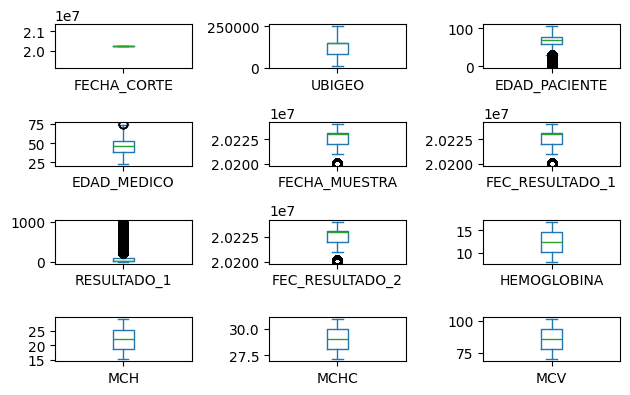

In [9]:
#Se visualiza la distribución de datos numéricos mediante un grafico de cajas y velas para cada variable numerica
# Ajustamos el tamaño de cada figura
plt.figure(figsize=(5, 10))

#Se crea un grupo de graficos de cajas y velas
dfnum.plot(kind='box', subplots=True, layout=(5, 3), sharex=False, sharey=False)

#Se ajusta el formato de ejes para cada subgrafico
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

#Se ajusta el diseño de los subplots
plt.tight_layout()

#Se muestra el gráfico
plt.show()

In [10]:
# Función para calcular el porcentaje de outliers para cada variable numérica
def calcular_porcentaje_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    # Definimos los límites para considerar un valor como outlier
    outliers = col[(col < Q1 - 1.5 * IQR) | (col > Q3 + 1.5 * IQR)]

    porcentaje = len(outliers) / len(col) * 100
    return porcentaje

# Aplicar la función a todas las columnas y almacenar los resultados
porcentajes_outliers = {}
for columna in dfnum.columns:
    porcentajes_outliers[columna] = calcular_porcentaje_outliers(dfnum[columna])

# Imprimir los resultados
for columna, porcentaje in porcentajes_outliers.items():
    print(f"La columna '{columna}' tiene un {porcentaje:.2f}% de outliers.")

La columna 'FECHA_CORTE' tiene un 0.00% de outliers.
La columna 'UBIGEO' tiene un 0.00% de outliers.
La columna 'EDAD_PACIENTE' tiene un 2.78% de outliers.
La columna 'EDAD_MEDICO' tiene un 0.00% de outliers.
La columna 'FECHA_MUESTRA' tiene un 8.81% de outliers.
La columna 'FEC_RESULTADO_1' tiene un 8.80% de outliers.
La columna 'RESULTADO_1' tiene un 1.62% de outliers.
La columna 'FEC_RESULTADO_2' tiene un 8.80% de outliers.
La columna 'HEMOGLOBINA' tiene un 0.00% de outliers.
La columna 'MCH' tiene un 0.00% de outliers.
La columna 'MCHC' tiene un 0.00% de outliers.
La columna 'MCV' tiene un 0.00% de outliers.


In [11]:
# Crear variable TARGET (variable objetivo)

# Primero, definimos la variable ANEMIA_FLAG que indica si un paciente tiene anemia o no
anemia_df['ANEMIA_FLAG'] = np.where(
    ((anemia_df['SEXO_PACIENTE']=='MASCULINO') & (anemia_df['HEMOGLOBINA']<13)) | ((anemia_df['SEXO_PACIENTE']=='FEMENINO') & (anemia_df['HEMOGLOBINA']<12)),
    1,0
)

In [12]:
# # Luego, definimos la variable TARGET que clasifica el tipo de anemia según el valor de MCV
anemia_df['TARGET'] = np.where(
    anemia_df['ANEMIA_FLAG'] == 1,
    np.select(
        [anemia_df['MCV'] < 80, (anemia_df['MCV'] >= 80) & (anemia_df['MCV'] <= 100), anemia_df['MCV'] > 100],
        ['Microcytic', 'Normocytic', 'Macrocytic'],
        default='Unknown'  # Providing a string default value instead of np.nan
    ),
    'No Anemia'  # For cases where ANEMIA_FLAG is 0, provide a string value instead of np.nan
)

In [13]:
# Verificamos la creación de la variable TARGET
anemia_df['TARGET']

0         Normocytic
1          No Anemia
2         Microcytic
3          No Anemia
4         Normocytic
             ...    
115344     No Anemia
115345    Microcytic
115346     No Anemia
115347    Microcytic
115348     No Anemia
Name: TARGET, Length: 115349, dtype: object

Numero de instancias pertenecientes a cada clase de la variable objetivo:

TARGET
Macrocytic     1782
Microcytic    18378
No Anemia     57874
Normocytic    37315
dtype: int64



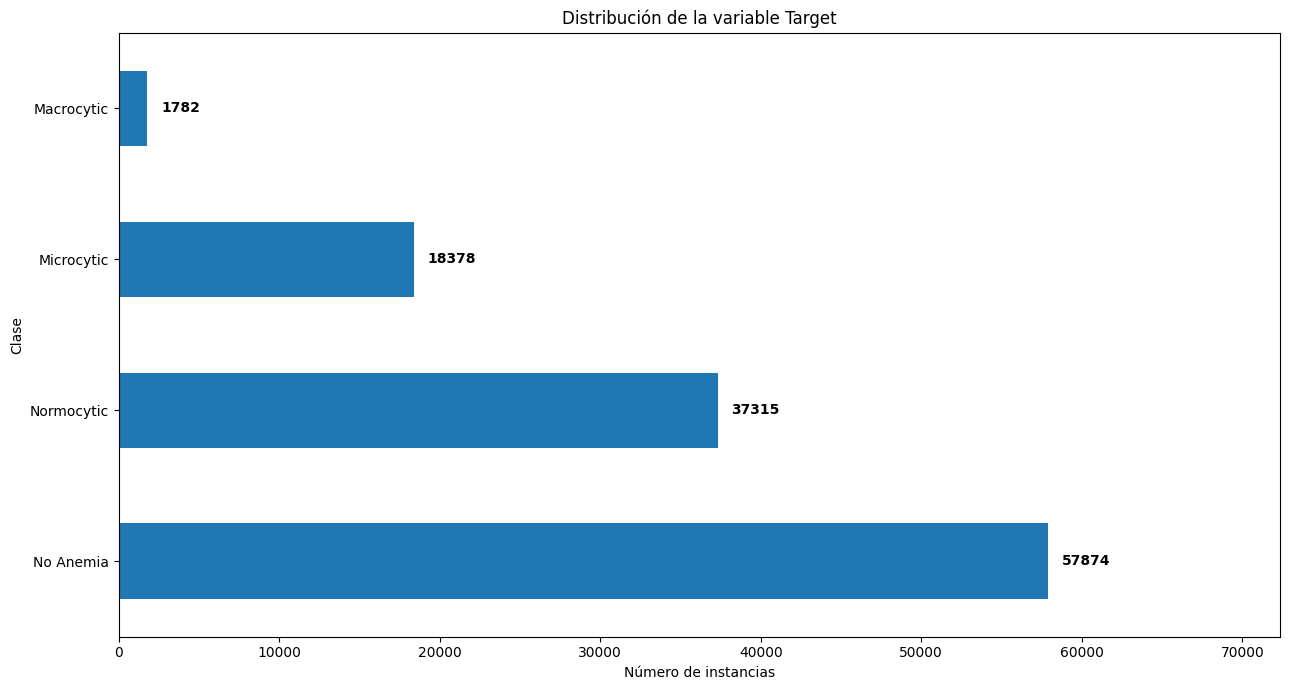

In [14]:
#Análisis de variable objetivo
print("Numero de instancias pertenecientes a cada clase de la variable objetivo:")
print()
print(anemia_df.groupby('TARGET').size())
print()

counts = anemia_df['TARGET'].value_counts()

counts = counts.sort_values(ascending=False)

plt.figure(figsize=(13, 7)) 

ax = counts.plot(kind='barh')

max_val = counts.max()
dynamic_offset = max_val * 0.015

for i, (label, value) in enumerate(zip(counts.index, counts.values)):
    ax.text(
        value + dynamic_offset, 
        i,
        str(value),
        va='center',
        ha='left',
        fontsize=10, 
        color='black', 
        weight='bold', 
        zorder=3 
    )

plt.xlabel('Número de instancias')
plt.ylabel('Clase')
plt.title('Distribución de la variable Target')

max_value_for_xlim = counts.max()
plt.xlim(0, max_value_for_xlim * 1.25) 

plt.tight_layout() 

plt.show()

Tipo 1: Microcítica: En la anemia microcítica, los glóbulos rojos no tienen suficiente hemoglobina, por lo que son más pequeños de lo normal.

Tipo 2: Normocítica: En la anemia normocítica, no hay suficientes glóbulos rojos para satisfacer las necesidades del cuerpo. La anemia normocítica suele acompañar a ciertas enfermedades crónicas.

Tipo 3: Macrocítica: La anemia macrocítica ocurre cuando la médula ósea produce glóbulos rojos más grandes de lo normal.

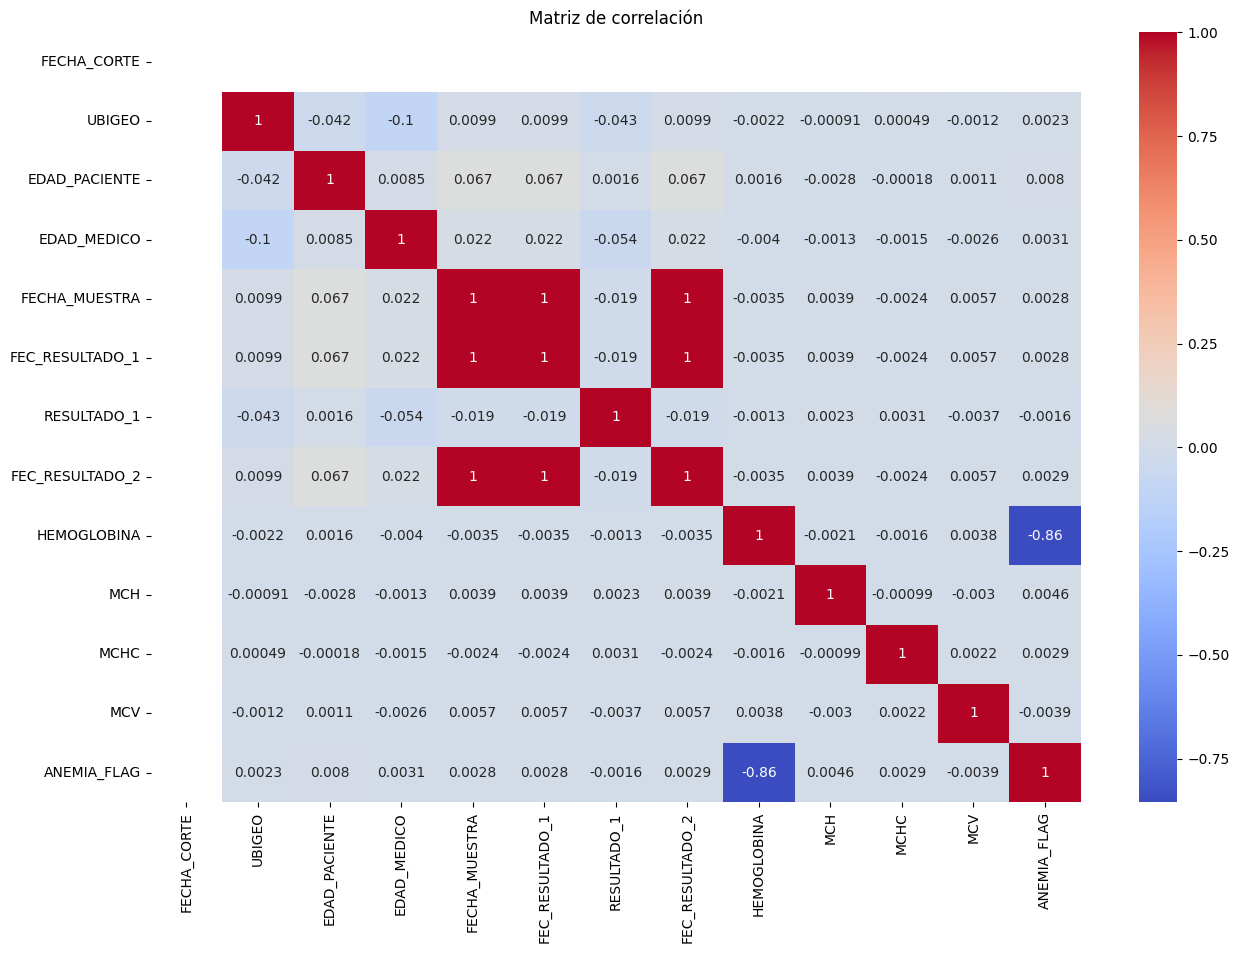

In [15]:
#Matriz de correlación de variables
df_numeric = anemia_df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

3. Codificación de variables

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original dataframe
anemia_df_le = anemia_df.copy()

# Encode 'TARGET' using LabelEncoder
le_target = LabelEncoder()
anemia_df_le['TARGET'] = le_target.fit_transform(anemia_df_le['TARGET'])

# Encode 'SEXO_PACIENTE' using LabelEncoder
le_sexo = LabelEncoder()
anemia_df_le['SEXO_PACIENTE'] = le_sexo.fit_transform(anemia_df_le['SEXO_PACIENTE'])

# Identify remaining categorical columns (excluding already encoded ones)
categorical_cols = anemia_df_le.select_dtypes(include='object').columns

# Apply One-Hot Encoding to remaining categorical columns
anemia_df_le = pd.get_dummies(anemia_df_le, columns=categorical_cols)

# Display the first few rows
anemia_df_le.head()

,FECHA_CORTE,UBIGEO,EDAD_PACIENTE,SEXO_PACIENTE,EDAD_MEDICO,FECHA_MUESTRA,FEC_RESULTADO_1,RESULTADO_1,FEC_RESULTADO_2,HEMOGLOBINA,...,RESULTADO_2_99.79,RESULTADO_2_99.8,RESULTADO_2_99.83,RESULTADO_2_99.87,RESULTADO_2_99.9,RESULTADO_2_99.91,RESULTADO_2_99.94,RESULTADO_2_99.96,UNIDADES_2_mg/dL,UNIDADES_2_mmol/lt
0,20240531,70102,80,1,45,20200102,20200102,94.00,20200102,12.2,...,False,False,False,False,False,False,False,False,True,False
1,20240531,100102,70,0,49,20200102,20200107,0.61,20200107,15.9,...,False,False,False,False,False,False,False,False,True,False
2,20240531,100102,61,1,49,20200102,20200108,1.16,20200108,11.3,...,False,False,False,False,False,False,False,False,True,False
3,20240531,100102,91,1,49,20200102,20200108,1.54,20200108,14.9,...,False,False,False,False,False,False,False,False,True,False
4,20240531,100102,52,1,49,20200102,20200125,9.97,20200125,9.8,...,False,False,False,False,False,False,False,False,True,False


In [17]:
# Print mapping for TARGET encoding
print("\n--- Mapeo de Clases para la columna 'TARGET' ---")
for i, class_name in enumerate(le_target.classes_):
    print(f"  '{class_name}' -> {i}")

# Print mapping for SEXO_PACIENTE encoding
print("\n--- Mapeo de Clases para la columna 'SEXO_PACIENTE' ---")
for i, class_name in enumerate(le_sexo.classes_):
    print(f"  '{class_name}' -> {i}")


--- Mapeo de Clases para la columna 'TARGET' ---
  'Macrocytic' -> 0
  'Microcytic' -> 1
  'No Anemia' -> 2
  'Normocytic' -> 3

--- Mapeo de Clases para la columna 'SEXO_PACIENTE' ---
  'FEMENINO' -> 0
  'MASCULINO' -> 1


In [18]:
anemia_df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115349 entries, 0 to 115348
Columns: 70374 entries, FECHA_CORTE to UNIDADES_2_mmol/lt
dtypes: bool(70359), float64(5), int64(10)
memory usage: 7.6 GB


In [19]:
#Evaluando dimensión del dataset (numero de filas y columnas) con la funcion shape
print("El dataset sin encoding tiene", anemia_df_le.shape[0], "instancias y", anemia_df_le.shape[1], "columnas.")
#Evaluando dimensión del dataset (numero de filas y columnas) con la funcion shape
print("El dataset con encoding tiene", anemia_df_le.shape[0], "instancias y", anemia_df_le.shape[1], "columnas.")

El dataset sin encoding tiene 115349 instancias y 70374 columnas.
El dataset con encoding tiene 115349 instancias y 70374 columnas.


In [20]:
anemia_df_le.describe()

,FECHA_CORTE,UBIGEO,EDAD_PACIENTE,SEXO_PACIENTE,EDAD_MEDICO,FECHA_MUESTRA,FEC_RESULTADO_1,RESULTADO_1,FEC_RESULTADO_2,HEMOGLOBINA,MCH,MCHC,MCV,ANEMIA_FLAG,TARGET
count,115349.0,115349.000000,115349.000000,115349.000000,115349.000000,1.153490e+05,1.153490e+05,115349.000000,1.153490e+05,115349.000000,115349.000000,115349.000000,115349.000000,115349.000000,115349.000000
mean,20240531.0,131023.910732,66.370294,0.536390,46.517430,2.022426e+07,2.022427e+07,40.570421,2.022427e+07,12.492889,21.990829,29.004592,85.545911,0.498270,2.133274
std,0.0,57039.229998,15.461049,0.498676,9.544202,1.144138e+04,1.143932e+04,66.047166,1.143950e+04,2.542406,3.988446,1.100855,8.944622,0.499999,0.725851
min,20240531.0,10101.000000,0.000000,0.000000,23.000000,2.020010e+07,2.020010e+07,0.000000,2.020010e+07,8.100000,15.100000,27.100000,70.000000,0.000000,0.000000
25%,20240531.0,80101.000000,58.000000,0.000000,39.000000,2.022022e+07,2.022022e+07,1.370000,2.022022e+07,10.300000,18.500000,28.100000,77.800000,0.000000,2.000000
50%,20240531.0,150101.000000,69.000000,1.000000,46.000000,2.023013e+07,2.023020e+07,4.950000,2.023020e+07,12.500000,22.000000,29.000000,85.600000,0.000000,2.000000
75%,20240531.0,150142.000000,77.000000,1.000000,53.000000,2.023093e+07,2.023093e+07,88.000000,2.023093e+07,14.700000,25.400000,30.000000,93.300000,1.000000,3.000000
max,20240531.0,250107.000000,105.000000,1.000000,75.000000,2.024043e+07,2.024043e+07,997.000000,2.024043e+07,16.900000,28.900000,30.900000,101.000000,1.000000,3.000000


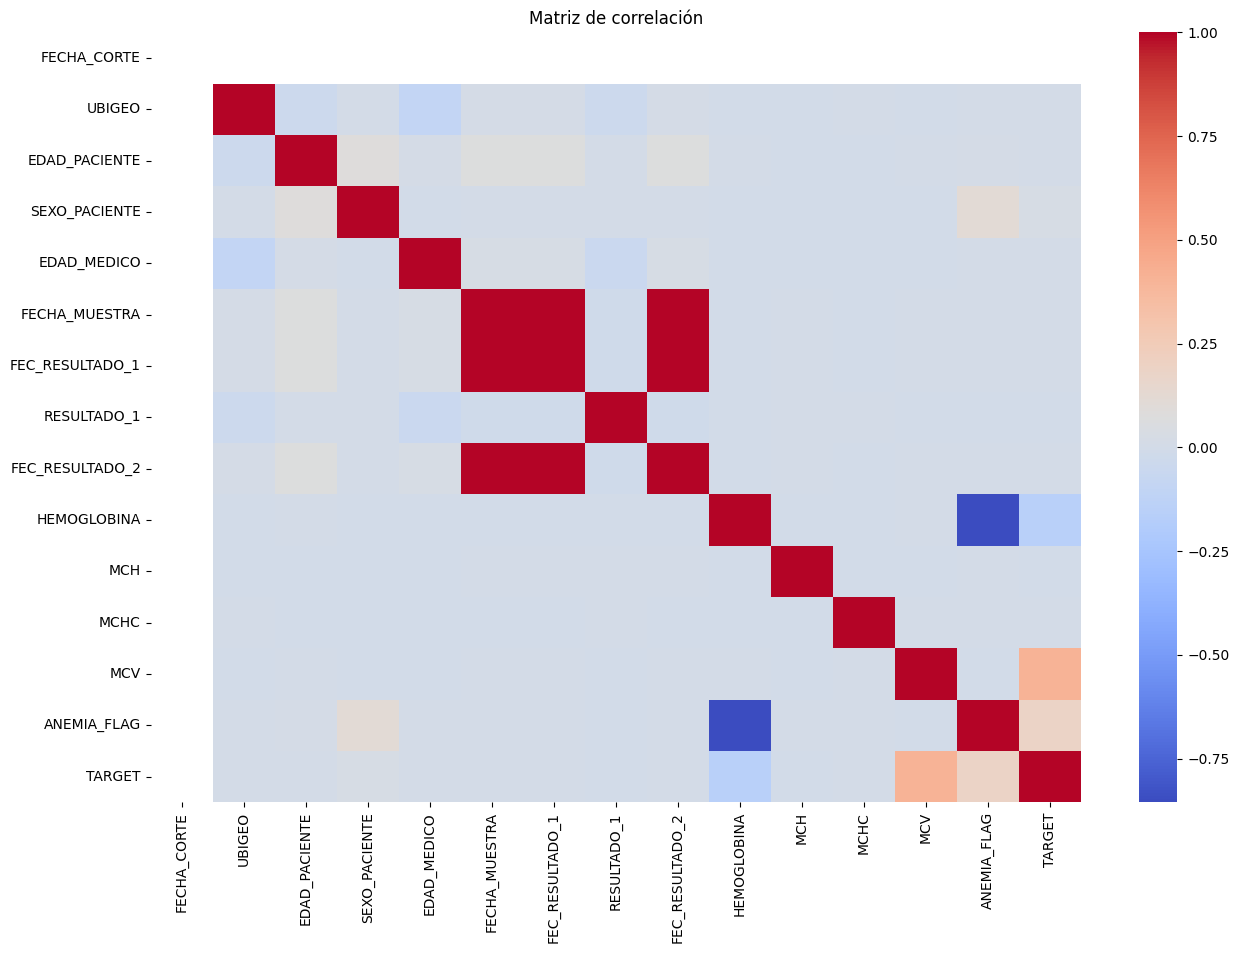

In [21]:
#Matriz de correlación de variables
df_numeric = anemia_df_le.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,  cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## 4. Creación de modelos de clasificación inicial

### 4.1. Creación de grupos de datos

In [22]:
# Separar características y variable objetivo
X = anemia_df_le[['EDAD_PACIENTE', 'SEXO_PACIENTE', 'HEMOGLOBINA', 'MCH', 'MCHC', 'MCV', 'ANEMIA_FLAG']]
Y = anemia_df_le['TARGET']
# Normalización de variables de entrada
Xesc = MinMaxScaler().fit_transform(X)

# Dividir los datos en entrenamiento y prueba
x_tr, x_te, y_tr, y_te = train_test_split(Xesc, Y, test_size=0.2, random_state=42)

### 4.2. Creación de modelos

Se utilizarán los siguientes algoritmos de prueba:

1. Multinomial Naive Bayes: Es una versión del algoritmo Naive Bayes que es especialmente adecuada para la clasificación de datos discretos, como el conteo de palabras en documentos (clasificación de texto). Se basa en el Teorema de Bayes con una suposición de "independencia ingenua" entre las características. Asume que la presencia de una característica particular en una clase no está relacionada con la presencia de cualquier otra característica. A pesar de esta suposición simplista, a menudo funciona sorprendentemente bien en tareas de clasificación de texto.

In [23]:
# Crear el modelo 1 - Multinominal Naive Bayes
modeloMNB = MultinomialNB()
modeloMNB.fit(x_tr, y_tr)

# Hacer predicciones y evaluar el modelo
y_pred_MNB = modeloMNB.predict(x_te)

2. Support Vector Classifier: Un algoritmo potente para problemas de clasificación. Su objetivo principal es encontrar el hiperplano óptimo que mejor separe las clases en el espacio de características. Este hiperplano se elige para maximizar el margen (la distancia) entre el hiperplano y los puntos de datos más cercanos de cada clase (conocidos como "vectores de soporte"). SVM puede manejar datos linealmente separables y no linealmente separables (usando trucos de kernel para mapear los datos a un espacio de mayor dimensión donde pueden ser linealmente separables).

In [24]:
# Crear el modelo 2 - Support Vector Classifier
modeloSVC = SVC(kernel='linear')
modeloSVC.fit(x_tr, y_tr)

# Hacer predicciones y evaluar el modelo
y_pred_SVC = modeloSVC.predict(x_te)

3. Decision Tree: Un algoritmo de aprendizaje supervisado que construye un modelo en forma de estructura de árbol. Cada nodo interno representa una "prueba" sobre un atributo (característica), cada rama representa el resultado de esa prueba, y cada nodo hoja representa una etiqueta de clase o un valor de predicción. El proceso de construcción del árbol implica dividir recursivamente el conjunto de datos en subconjuntos basados en los valores de los atributos hasta que los nodos hoja contengan registros de una sola clase o se cumpla algún otro criterio de detención. Son fáciles de entender e interpretar.

In [25]:
# Crear el modelo 3 - Decision Tree Classifier
modeloDTC = DecisionTreeClassifier()
modeloDTC.fit(x_tr, y_tr)

# Hacer predicciones y evaluar el modelo
y_pred_DTC = modeloDTC.predict(x_te)

4. Random Forest: Es un algoritmo de ensemble basado en bagging. Combina múltiples árboles de decisión individuales para mejorar la precisión y evitar el sobreajuste. En Random Forest, cada árbol se entrena en un subconjunto aleatorio de los datos de entrenamiento (con reemplazo, lo que se llama "bootstrap") y solo considera un subconjunto aleatorio de características en cada división. Las predicciones finales se obtienen mediante la votación de los resultados de todos los árboles (para clasificación) o promediando sus resultados (para regresión).

In [26]:
# Crear el modelo 4 - Random Forest Classifier
modeloRFC = RandomForestClassifier(n_estimators=100)
modeloRFC.fit(x_tr, y_tr)

# Hacer predicciones y evaluar el modelo
y_pred_RFC = modeloRFC.predict(x_te)

5. BaggingClassifier: Un meta-estimador de ensemble que implementa el método de Bagging (Bootstrap Aggregating). Funciona entrenando múltiples versiones de un estimador base (por ejemplo, árboles de decisión, pero podría ser cualquier otro algoritmo) en diferentes submuestras de bootstrap del conjunto de datos de entrenamiento (muestreo con reemplazo). Las predicciones finales se agregan (mediante votación para clasificación o promedio para regresión) a partir de las predicciones de los estimadores individuales. Su principal objetivo es reducir la varianza y el sobreajuste.

In [27]:
# Crear el modelo 5 - Baging Classifier

# Crear una instancia de DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier() 

# Usar DecisionTreeClassifier como estimador en BaggingClassifier
modeloBGC = BaggingClassifier(estimator=dt_classifier, n_estimators=100)
modeloBGC.fit(x_tr, y_tr)

# Hacer predicciones y evaluar el modelo
y_pred_BGC = modeloBGC.predict(x_te)

6. XGBClassifier: Una implementación optimizada y altamente eficiente del algoritmo de Gradient Boosting Machine (GBM). Es conocido por su velocidad, rendimiento y precisión, y es muy popular en competiciones de machine learning. XGBoost construye un modelo de forma aditiva en una serie de "aprendices débiles" (generalmente árboles de decisión), donde cada nuevo árbol corrige los errores de los árboles anteriores. Incorpora técnicas avanzadas como regularización para evitar el sobreajuste y paralelización para acelerar el entrenamiento. Es particularmente efectivo en conjuntos de datos tabulares.

In [28]:
# Crear el modelo 6 - XGBoost Classifier
modeloXGB = XGBClassifier(eval_metric='logloss')
modeloXGB.fit(x_tr, y_tr)

# Hacer predicciones y evaluar el modelo
y_pred_XGB = modeloXGB.predict(x_te)

### 4.3. Cálculo de métricas de desempeño

In [29]:
accuracy_MNB = accuracy_score(y_te, y_pred_MNB)
precision_MNB = precision_score(y_te, y_pred_MNB, average='weighted')
recall_MNB = recall_score(y_te, y_pred_MNB, average='weighted')
f1_MNB =  2 * (precision_MNB * recall_MNB) / (precision_MNB + recall_MNB)


print(f" accuracy (Naive Bayes): {accuracy_MNB}")
print(f" precision (Naive Bayes): {precision_MNB}")
print(f" recall (Naive Bayes): {recall_MNB}")
print(f" f1-score (Naive Bayes): {f1_MNB}")

print()

accuracy_SVC = accuracy_score(y_te, y_pred_SVC)
precision_SVC = precision_score(y_te, y_pred_SVC, average='weighted')
recall_SVC = recall_score(y_te, y_pred_SVC, average='weighted')
f1_SVC =  2 * (precision_SVC * recall_SVC) / (precision_SVC + recall_SVC)


print(f" accuracy (Support Vector Classifier): {accuracy_SVC}")
print(f" precision (Support Vector Classifier): {precision_SVC}")
print(f" recall (Support Vector Classifier): {recall_SVC}")
print(f" f1-score (Support Vector Classifier): {f1_SVC}")

print()

accuracy_DTC = accuracy_score(y_te, y_pred_DTC)
precision_DTC = precision_score(y_te, y_pred_DTC, average='weighted')
recall_DTC = recall_score(y_te, y_pred_DTC, average='weighted')
f1_DTC =  2 * (precision_DTC * recall_DTC) / (precision_DTC + recall_DTC)


print(f" accuracy (Decision Tree Classifier): {accuracy_DTC}")
print(f" precision (Decision Tree Classifier): {precision_DTC}")
print(f" recall (Decision Tree Classifier): {recall_DTC}")
print(f" f1-score (Decision Tree Classifier): {f1_DTC}")

print()

accuracy_RFC = accuracy_score(y_te, y_pred_RFC)
precision_RFC = precision_score(y_te, y_pred_RFC, average='weighted')
recall_RFC = recall_score(y_te, y_pred_RFC, average='weighted')
f1_RFC =  2 * (precision_RFC * recall_RFC) / (precision_RFC + recall_RFC)


print(f" accuracy (Random Forest): {accuracy_RFC}")
print(f" precision (Random Forest): {precision_RFC}")
print(f" recall (Random Forest): {recall_RFC}")
print(f" f1-score (Random Forest): {f1_RFC}")

print()

accuracy_BGC = accuracy_score(y_te, y_pred_BGC)
precision_BGC = precision_score(y_te, y_pred_BGC, average='weighted')
recall_BGC = recall_score(y_te, y_pred_BGC, average='weighted')
f1_BGC =  2 * (precision_BGC * recall_BGC) / (precision_BGC + recall_BGC)


print(f" accuracy (Bagging Classifier): {accuracy_BGC}")
print(f" precision (Bagging Classifier): {precision_BGC}")
print(f" recall (Bagging Classifier): {recall_BGC}")
print(f" f1-score (Bagging Classifier): {f1_BGC}")

print()

accuracy_XGB = accuracy_score(y_te, y_pred_XGB)
precision_XGB = precision_score(y_te, y_pred_XGB, average='weighted')
recall_XGB = recall_score(y_te, y_pred_XGB, average='weighted')
f1_XGB =  2 * (precision_XGB * recall_XGB) / (precision_XGB + recall_XGB)


print(f" accuracy (XGB Classifier): {accuracy_XGB}")
print(f" precision (XGB Classifier): {precision_XGB}")
print(f" recall (XGB Classifier): {recall_XGB}")
print(f" f1-score (XGB Classifier): {f1_XGB}")

 accuracy (Naive Bayes): 0.8261378413524058
 precision (Naive Bayes): 0.7130425978612684
 recall (Naive Bayes): 0.8261378413524058
 f1-score (Naive Bayes): 0.7654352375870376

 accuracy (Support Vector Classifier): 0.9995231902904205
 precision (Support Vector Classifier): 0.9995260583782063
 recall (Support Vector Classifier): 0.9995231902904205
 f1-score (Support Vector Classifier): 0.9995246243322559

 accuracy (Decision Tree Classifier): 1.0
 precision (Decision Tree Classifier): 1.0
 recall (Decision Tree Classifier): 1.0
 f1-score (Decision Tree Classifier): 1.0

 accuracy (Random Forest): 1.0
 precision (Random Forest): 1.0
 recall (Random Forest): 1.0
 f1-score (Random Forest): 1.0

 accuracy (Bagging Classifier): 1.0
 precision (Bagging Classifier): 1.0
 recall (Bagging Classifier): 1.0
 f1-score (Bagging Classifier): 1.0

 accuracy (XGB Classifier): 1.0
 precision (XGB Classifier): 1.0
 recall (XGB Classifier): 1.0
 f1-score (XGB Classifier): 1.0


/Users/luigi/Documents/UPC/machine-learning/taller/TF_Machine_Learning_Anemia/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### 4.4. Cálculo de matriz de confusión

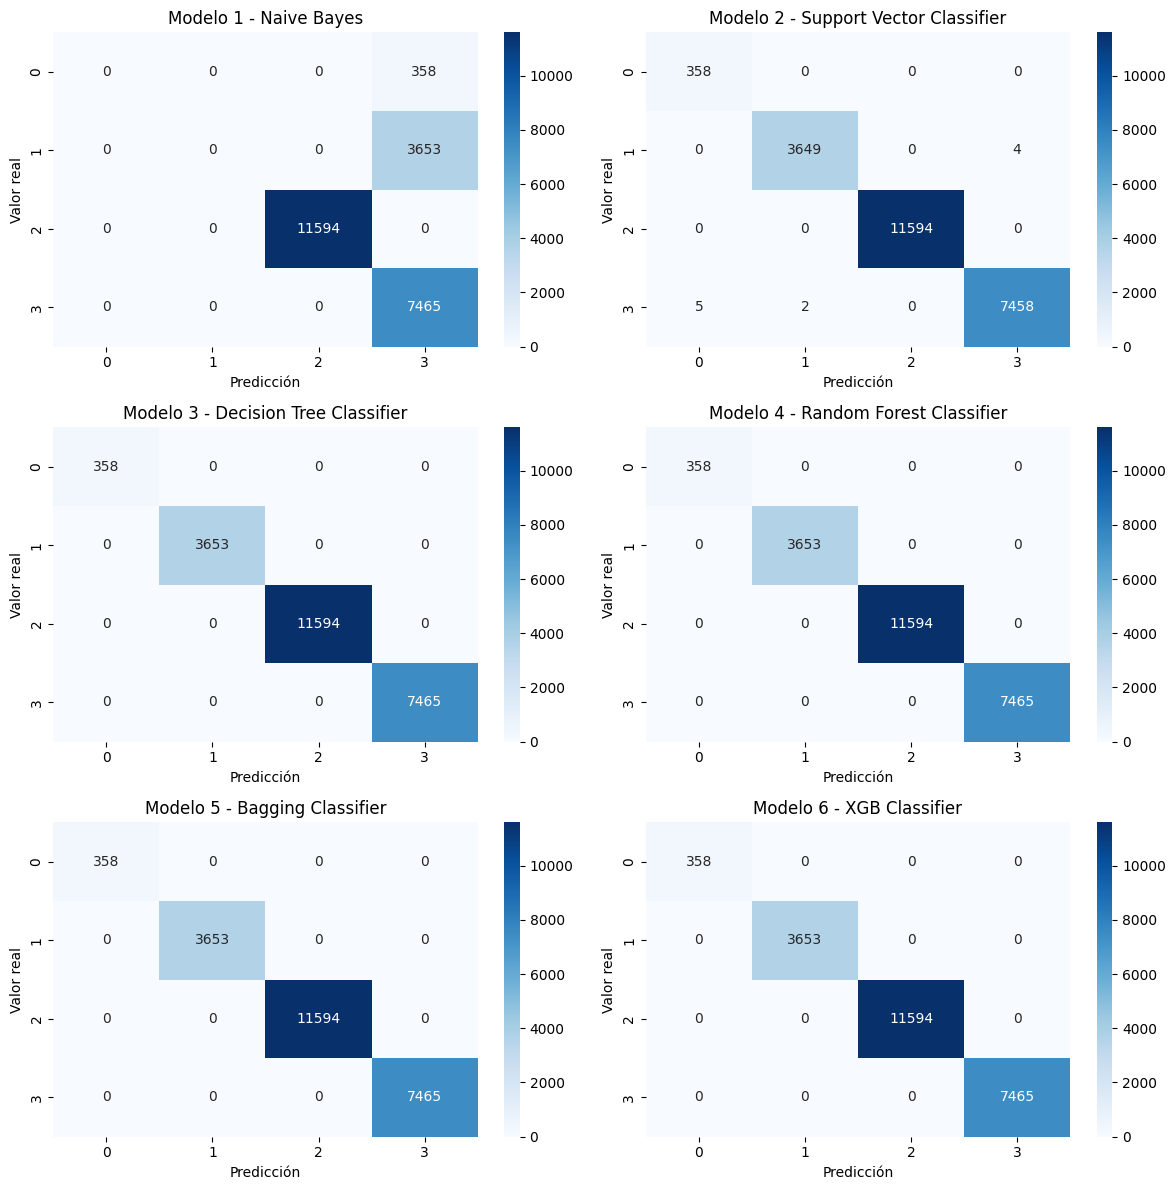

In [30]:
matrices = [
    confusion_matrix(y_te, y_pred_MNB),
    confusion_matrix(y_te, y_pred_SVC),
    confusion_matrix(y_te, y_pred_DTC),
    confusion_matrix(y_te, y_pred_RFC),
    confusion_matrix(y_te, y_pred_BGC),
    confusion_matrix(y_te, y_pred_XGB)
]

# Etiquetas para las clases (A, B, C, D, F)
#classes = ['A', 'B', 'C', 'D', 'F']

# Títulos para cada matriz (puedes personalizarlos)
titles = ['Modelo 1 - Naive Bayes', 'Modelo 2 - Support Vector Classifier', 'Modelo 3 - Decision Tree Classifier', 
        'Modelo 4 - Random Forest Classifier', 'Modelo 5 - Bagging Classifier', 'Modelo 6 - XGB Classifier']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    sns.heatmap(matrices[i], annot=True, fmt="d", cmap="Blues", ax=ax)
                #xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Valor real')
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()


### 4.5. Comparación de resultados

In [31]:
#Código para mostrar la comparación de métricas de desempeño de las cuatro propuestas en tabla
# Datos de las métricas
resultadosReg = {'Modelo': ['Multinominal Naive Bayes','Support Vector Classifier', 'Decision Tree Classifier','Random Forest Classifier','Bagging Classifier','XGB Classifier'],
        'Abreviatura': ['MNB','SVC', 'DTC','RFC','BGC','XGB'],
        'Accuracy': [accuracy_MNB, accuracy_SVC, accuracy_DTC, accuracy_RFC, accuracy_BGC, accuracy_XGB],
        'Precision': [precision_MNB, precision_SVC, precision_DTC, precision_RFC, precision_BGC, precision_XGB],
        'Recall': [recall_MNB, recall_SVC, recall_DTC, recall_RFC, recall_BGC, recall_XGB],
        'F1-Score': [f1_MNB, f1_SVC, f1_DTC, f1_RFC, f1_BGC, f1_XGB]}

# Crear el DataFrame
df_res = pd.DataFrame(resultadosReg)

# Mostrar la tabla
df_res.head(6)

,Modelo,Abreviatura,Accuracy,Precision,Recall,F1-Score
0,Multinominal Naive Bayes,MNB,0.826138,0.713043,0.826138,0.765435
1,Support Vector Classifier,SVC,0.999523,0.999526,0.999523,0.999525
2,Decision Tree Classifier,DTC,1.000000,1.000000,1.000000,1.000000
3,Random Forest Classifier,RFC,1.000000,1.000000,1.000000,1.000000
4,Bagging Classifier,BGC,1.000000,1.000000,1.000000,1.000000
5,XGB Classifier,XGB,1.000000,1.000000,1.000000,1.000000


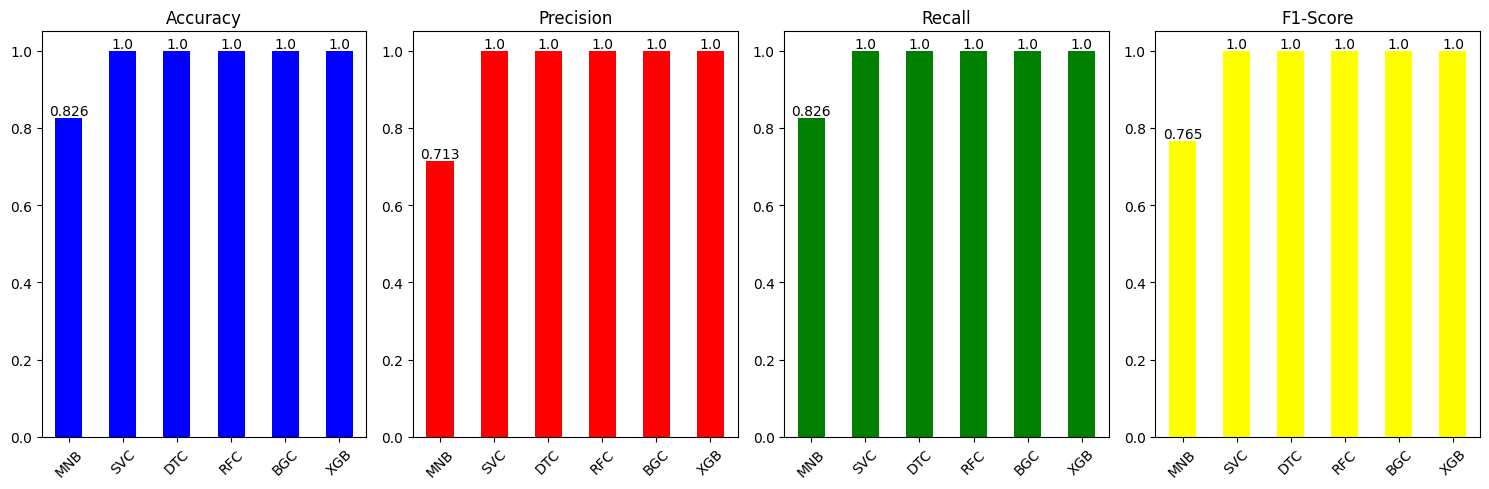

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Accuracy
df_res.plot(x='Abreviatura', y='Accuracy', kind='bar', ax=axes[0], title='Accuracy', color='blue', legend=False)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
for p in axes[0].patches:
    height = round(p.get_height(), 3)
    axes[0].annotate(str(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Precision
df_res.plot(x='Abreviatura', y='Precision', kind='bar', ax=axes[1], title='Precision', color='red', legend=False)
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)
for p in axes[1].patches:
    height = round(p.get_height(), 3)
    axes[1].annotate(str(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Recall
df_res.plot(x='Abreviatura', y='Recall', kind='bar', ax=axes[2], title='Recall', color='green', legend=False)
axes[2].set_xlabel('')
axes[2].tick_params(axis='x', rotation=45)
for p in axes[2].patches:
    height = round(p.get_height(), 3)
    axes[2].annotate(str(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# F1-Score
df_res.plot(x='Abreviatura', y='F1-Score', kind='bar', ax=axes[3], title='F1-Score', color='yellow', legend=False)
axes[3].set_xlabel('')
axes[3].tick_params(axis='x', rotation=45)
for p in axes[3].patches:
    height = round(p.get_height(), 3)
    axes[3].annotate(str(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()